In [8]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import string
import nltk
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [9]:
user_ratings = pd.read_csv("../data/bgg_user_ratings.csv")

In [10]:
user_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13170073 entries, 0 to 13170072
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   user        object 
 2   rating      float64
 3   comment     object 
 4   ID          int64  
 5   name        object 
dtypes: float64(1), int64(2), object(3)
memory usage: 602.9+ MB


In [11]:
user_ratings.shape

(13170073, 6)

In [12]:
len(user_ratings['user'].unique())

289914

In [13]:
len(user_ratings['ID'].unique())

17065

In [14]:
user_ratings.isna().sum()

Unnamed: 0           0
user                66
rating               0
comment       10532317
ID                   0
name                 0
dtype: int64

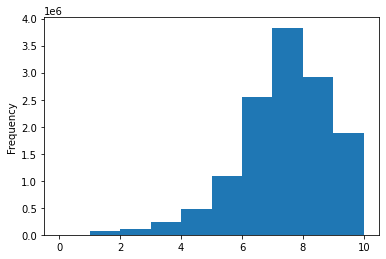

In [15]:
user_ratings['rating'].plot(kind='hist')
plt.show()

In [17]:
user_ratings_comments = user_ratings[user_ratings['comment'].notna()]

In [18]:
user_ratings_comments.shape

(2637756, 6)

In [19]:
user_ratings_comments.isna().sum()

Unnamed: 0    0
user          0
rating        0
comment       0
ID            0
name          0
dtype: int64

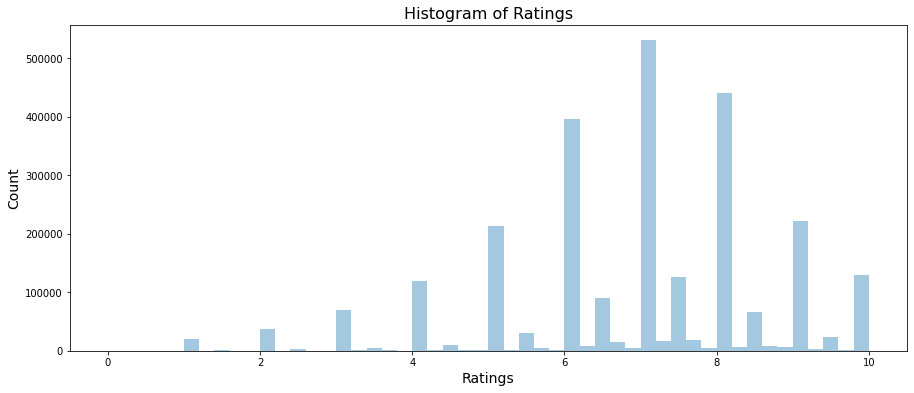

In [22]:
f, ax = plt.subplots(figsize = (15,6))
sns.distplot(user_ratings_comments.rating, kde=False);
plt.title('Histogram of Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [25]:
user_ratings_comments['cleaned'] = user_ratings_comments['comment'].str.lower().apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

/Users/janki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
stopwords_list = stopwords.words('english')
stopwords_list.extend(('game','play','played','players','player','people','really','board','games','one','plays','cards','would')) 

In [28]:
stopwords_list[-10:]

#remove stopwords
user_ratings_comments['cleaned'] = user_ratings_comments['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))

/Users/janki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
user_ratings_comments.head()

,Unnamed: 0,user,rating,comment,ID,name,cleaned
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan,currently sits list favorite
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan,know says many many many uncounted liked versi...
7,7,hreimer,10.0,i will never tire of this game.. Awesome,13,Catan,never tire awesome
11,11,daredevil,10.0,This is probably the best game I ever played. ...,13,Catan,probably best ever requires thinking develops ...
16,16,hurkle,10.0,Fantastic game. Got me hooked on games all ove...,13,Catan,fantastic got hooked


In [30]:
Counter(" ".join(user_ratings_comments["cleaned"]).split()).most_common(50)[:50]


[('like', 520928),
 ('fun', 517741),
 ('good', 398761),
 ('great', 329470),
 ('much', 294739),
 ('get', 272893),
 ('time', 267228),
 ('rules', 206375),
 ('playing', 205263),
 ('well', 204422),
 ('little', 197548),
 ('card', 196138),
 ('first', 194761),
 ('dont', 187801),
 ('lot', 186538),
 ('better', 185497),
 ('theme', 174253),
 ('bit', 172439),
 ('still', 170605),
 ('interesting', 169574),
 ('nice', 165562),
 ('love', 162865),
 ('think', 162409),
 ('also', 159633),
 ('2', 157183),
 ('best', 145403),
 ('simple', 143511),
 ('make', 143160),
 ('many', 141870),
 ('even', 140545),
 ('easy', 138906),
 ('im', 137002),
 ('two', 132547),
 ('dice', 129095),
 ('way', 127997),
 ('long', 127580),
 ('though', 126061),
 ('different', 125033),
 ('strategy', 123053),
 ('enough', 122649),
 ('luck', 115449),
 ('quite', 112459),
 ('3', 108941),
 ('feel', 108782),
 ('pretty', 108678),
 ('see', 106307),
 ('rating', 105542),
 ('need', 104551),
 ('4', 104534),
 ('turn', 104330)]

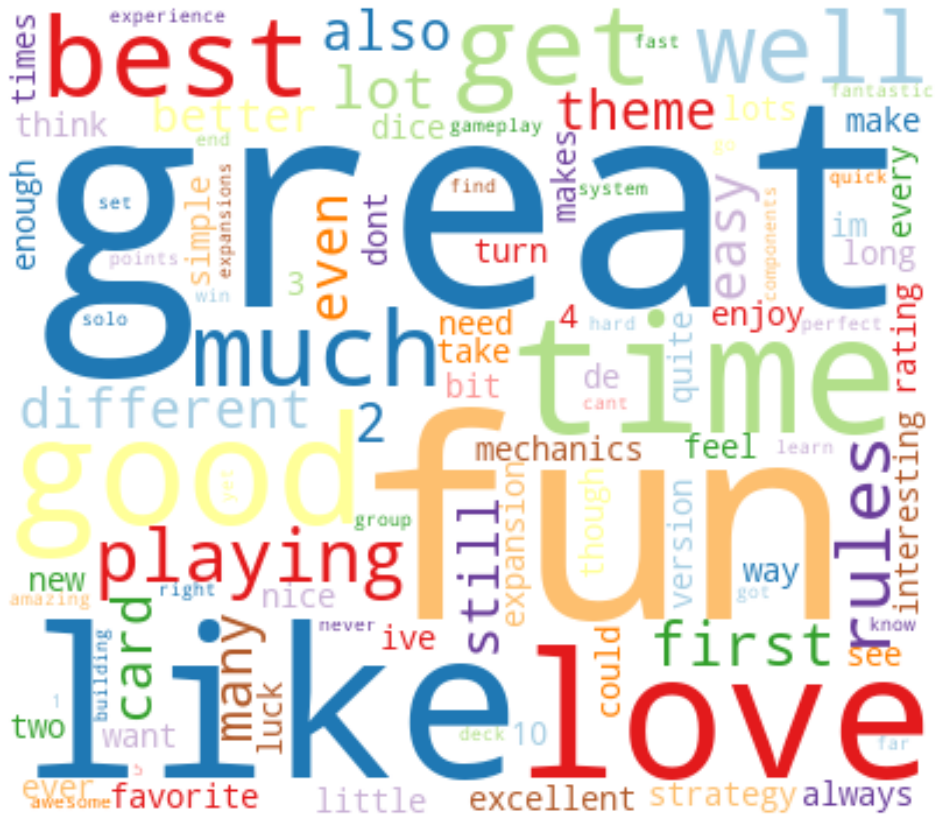

In [40]:
good_ratings = user_ratings_comments.loc[user_ratings_comments['rating'] > 8]


words = Counter([w for w in " ".join(good_ratings['cleaned']).split()])

wc = WordCloud(width=400, height=350,colormap='Paired',background_color='white').generate_from_frequencies(dict(words.most_common(100)))
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation='bilinear')
# plt.title('Common Words in Positive Reviews', fontsize=20)
plt.axis('off');
plt.show()


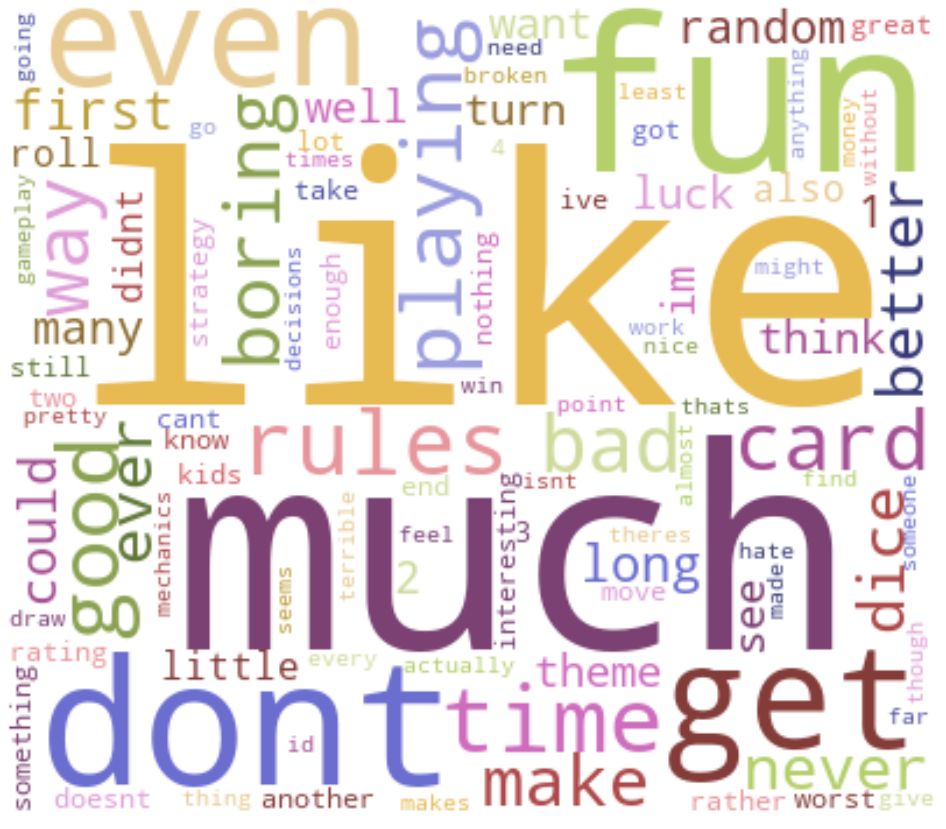

In [37]:
bad_ratings = user_ratings_comments.loc[user_ratings_comments['rating'] < 3]


words = Counter([w for w in " ".join(bad_ratings['cleaned']).split()])

wc = WordCloud(width=400, height=350,colormap='tab20b',background_color='white').generate_from_frequencies(dict(words.most_common(100)))
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation='bilinear')
# plt.title('Common Words in Negative Reviews', fontsize=20)
plt.axis('off');
plt.show()